In [1]:
import os
os.chdir('/local/crv/acanberk/folding-unfolding/src')

import torch
from torchvision import transforms
import h5py
from tqdm import tqdm
import torchvision
import numpy as np
from typing import Dict, Tuple, Optional
import os
import pathlib
import copy
from tqdm import tqdm
import sys
from itertools import product
import imutils
import cv2
import os
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


In [9]:
dataset_paths = [
    'final_experiments/single_distribution_pos/ckpt_17427_eval_0/replay_buffer.hdf5',
    # 'final_experiments/single-shirt/latest_ckpt_eval_0/replay_buffer.hdf5',
    # 'final_experiments/all_shirts/latest_ckpt_eval_0/replay_buffer.hdf5',
    # 'final_experiments/all_'
]

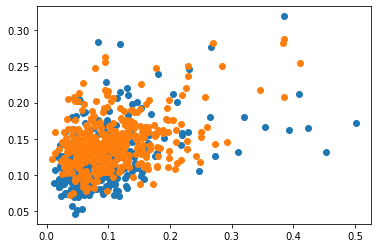

In [10]:
stats = {
    'dp':[],
    'deformable_distance':[],
    'rigid_distance':[]
}
for dataset_path in dataset_paths:
    with h5py.File(dataset_path, "r") as dataset:
        for k in dataset:
            if 'last' in k:
                stats['dp'].append(dataset_path)
                stats['deformable_distance'].append(dataset[k].attrs['postaction_l2_distance'])
                stats['rigid_distance'].append(dataset[k].attrs['postaction_icp_distance'])

df = pd.DataFrame(stats)
df.head()

for dp in dataset_paths:
    plt.scatter(df[df.dp == dp]['rigid_distance'], df[df.dp == dp]['deformable_distance'], label=dp)